# Making code faster

Hello everyone! For this exercise, we will use Numba and Cython to make faster calculations.

* **Numba** is a just-in-time compiler that generates fast machine code from our existing Python code.

* **Cython** allows us to call C functions and declare C types on variables and class attributes, making high-performance code
 ([GitHub](https://github.com/cython/cython/wiki)).



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **Numba**:
When trying to enhance our code, some questions can pop out: 

* Will a specific module improve the performance of my code? 



* Is it going to be almost the same? Maybe worse?


  
**Numba** is a good option if our code involves a lot of math, "for loops," and NumPy.

On the other hand, if we are working with Pandas, for example, the code won't be improved

In [ ]:
import pandas as pd
dsss = {'Semester week': [2, 3, 4, 5, 6], 'Lecture': ['Hardware', 'File handlng', 'Version control', 'Machine learning', 'Hardware']}

def pandas_function(our_dict):            # Function will not benefit from Numba jit
  df = pd.DataFrame.from_dict(our_dict)   # Numba doesn't know about pd.DataFrame
  return df.sort_values(by= ['Lecture'])  # Or this

print(pandas_function(dsss))

In [ ]:
%%timeit 
pandas_function

In [ ]:
!  pip install --upgrade numba # First, we need to upgrade numba to avoid some errors

In [ ]:
from numba import jit, njit # jit: numba's dectorator, njit: alias for @jit(nopython=True)

pandas_numba = jit(pandas_function)

In [ ]:
%%timeit
pandas_numba

As we see, the performance is almost the same.

Let's check now with the next function:

In [ ]:
def movingAverage(x, window=7):
    
    result = np.zeros_like(x)

    for i in range(window, x.size):
        
        result[i] = x[i-window:i].mean()
        
    return result

In [ ]:
x = np.linspace(0, 20, 10000)

In [ ]:
y = np.sin(x)+np.random.randn(x.size)/4

**1. To Do: use the ```nopython``` mode to run `movingAverage()` in machine code**

Answer:

In [ ]:
#TODO

**2. To Do: Calculate the moving average of y. Therefore use the `movingAverage() `function with and without the `nopython `mode. Compare both results using `%time`.**

Answer:

In [ ]:
#TODO

In [ ]:
#TODO

**3. To Do: the first time using ``movingAverageNumba`` takes longer, why?**

Answer: TODO

**4. To Do: compare both functions using `%timeit`.**

In [ ]:
#TODO

In [ ]:
#TODO

In [ ]:
# Plot:
plt.plot(x,y, label='y')
plt.plot(x, movingAverageNumba(y), label='movingAverageNumba')
plt.legend()

## Cython

We can load `cythonmagic` to interactively work with Cython by using:

In [ ]:
%load_ext Cython

In [ ]:
%%cython
def movingAverage_cython(x, window=7):
    result = np.zeros_like(x)
    for i in range(window, x.size):
        result[i] = x[i-window:i].mean()
        
    return result

**5. To Do: fix the error, use ``timeit``, and plot the results.**

In [ ]:
#TODO

In [ ]:
#TODO

In [ ]:
#TODO

# Profiling
Sometimes we wonder if there is a way to enhance the efficiency of our codes. A way to do it is by running a multiline process to find inefficient functions and operations: the so-called bottlenecks. To perform this multiline process, we need to install  ```line_profiler``` and load it using:

In [ ]:
! pip install line_profiler
%load_ext line_profiler

In [ ]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [ ]:
def sum_of_lists_numpy(N):
    total = 0
    for i in range(5):
        L = np.array([j ^ (j >> i) for j in range(N)])
        total += np.sum(L)
    return total


**6. To Do: perform a Line-By-Line profiling for both functions using the magic command ```%lprun```**

Answer:

In [ ]:
# TODO

In [ ]:
# TODO

**7. To Do: Which function is faster? Why?**

Answer: TODO

In [ ]:
%timeit sum_of_lists(50)

In [ ]:
%timeit sum_of_lists_numpy(50)

**8. Use Numba with ``sum_of_lists_numpy()`` to acelerate calculations.**

Answer

In [ ]:
# TODO

In [ ]:
%timeit faster_function(50)

**9. If we run ``faster_function`` with the line-by-line profiler, it does not show the time consumed by each line of the code. Why?**

In [ ]:
%lprun -f faster_function faster_function(50) 

Answer: TODO

## Working with inefficient functions: 

In [ ]:
from skimage import data, color
from skimage.transform import resize
from PIL import Image

In [ ]:
imgs = np.uint8(data.lfw_subset()*255)

In [ ]:
def res_skimage(imgs):
    new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
    res_im = []
    for im in imgs:
        image_resized = resize(im, new_size, anti_aliasing=True) 
        res_im.append(image_resized)
    return np.asarray(res_im)

In [ ]:
%time res_im_ski = res_skimage(imgs)

CPU times: user 287 ms, sys: 225 ms, total: 511 ms
Wall time: 285 ms


Text(0.5, 1.0, 'Resized')

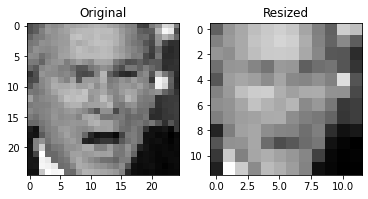

In [ ]:
plt.subplot(1,2,1); plt.imshow(imgs[0], cmap='gray'); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(res_im_ski[0], cmap='gray'); plt.title('Resized')

**10. To Do: perform a Line-By-Line profiling, find the bottleneck and fix it using a faster function. Plot the results.**

Answer:

In [ ]:
#TODO: line-by-line profiling

In [ ]:
#TODO: define a new function using, for example another library

In [ ]:
#TODO:  line-by-line profiling for the new function

In [ ]:
plt.subplot(1,3,1); plt.imshow(imgs[0], cmap='gray'); plt.title('Original')
plt.subplot(1,3,2); plt.imshow(res_im_ski[0], cmap='gray'); plt.title('Resized')
plt.subplot(1,3,3); plt.imshow(#TODO); plt.title('Resized with new function')